In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"


df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'

df_wine = pd.concat([df_red, df_white], ignore_index=True)

print("--- Les 5 premières lignes du DataFrame combiné : ---")
print(df_wine.head())

print("\n--- Informations techniques sur le DataFrame (df_wine.info()) : ---")
df_wine.info()


--- Les 5 premières lignes du DataFrame combiné : ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0    

Puisque nous avons 6497 lignes au total, cela signifie que nous n'avons aucune valeur manquante.

Étape 2 : EDA


--- Valeurs uniques pour 'quality' : [3 4 5 6 7 8 9] ---

--- Compte de chaque valeur (value_counts()) : ---
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


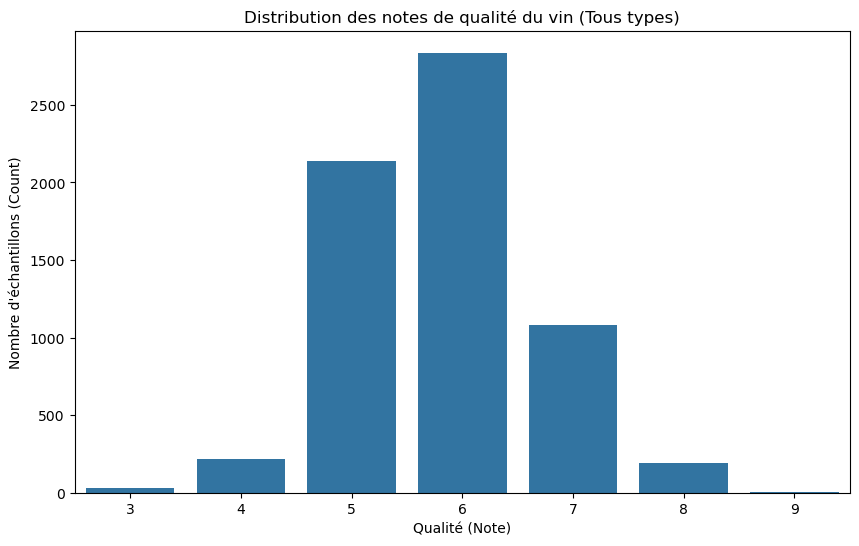

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_qualities = df_wine['quality'].unique()
unique_qualities.sort() # Pour les afficher dans l'ordre
print(f"--- Valeurs uniques pour 'quality' : {unique_qualities} ---")

print("\n--- Compte de chaque valeur (value_counts()) : ---")
print(df_wine['quality'].value_counts().sort_index()) 

plt.figure(figsize=(10, 6)) 
sns.countplot(x='quality', data=df_wine)
plt.title('Distribution des notes de qualité du vin (Tous types)')
plt.xlabel('Qualité (Note)')
plt.ylabel('Nombre d\'échantillons (Count)')
plt.show() 

Ce graphique nous montre que nos données sont déséquilibrées. Il y a beaucoup plus d'échantillons pour les "vins moyens" que pour les "vins extrêmes".

In [3]:
print("--- Résumé statistique des caractéristiques (df_wine.describe()) : ---")
print(df_wine.describe())

--- Résumé statistique des caractéristiques (df_wine.describe()) : ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.

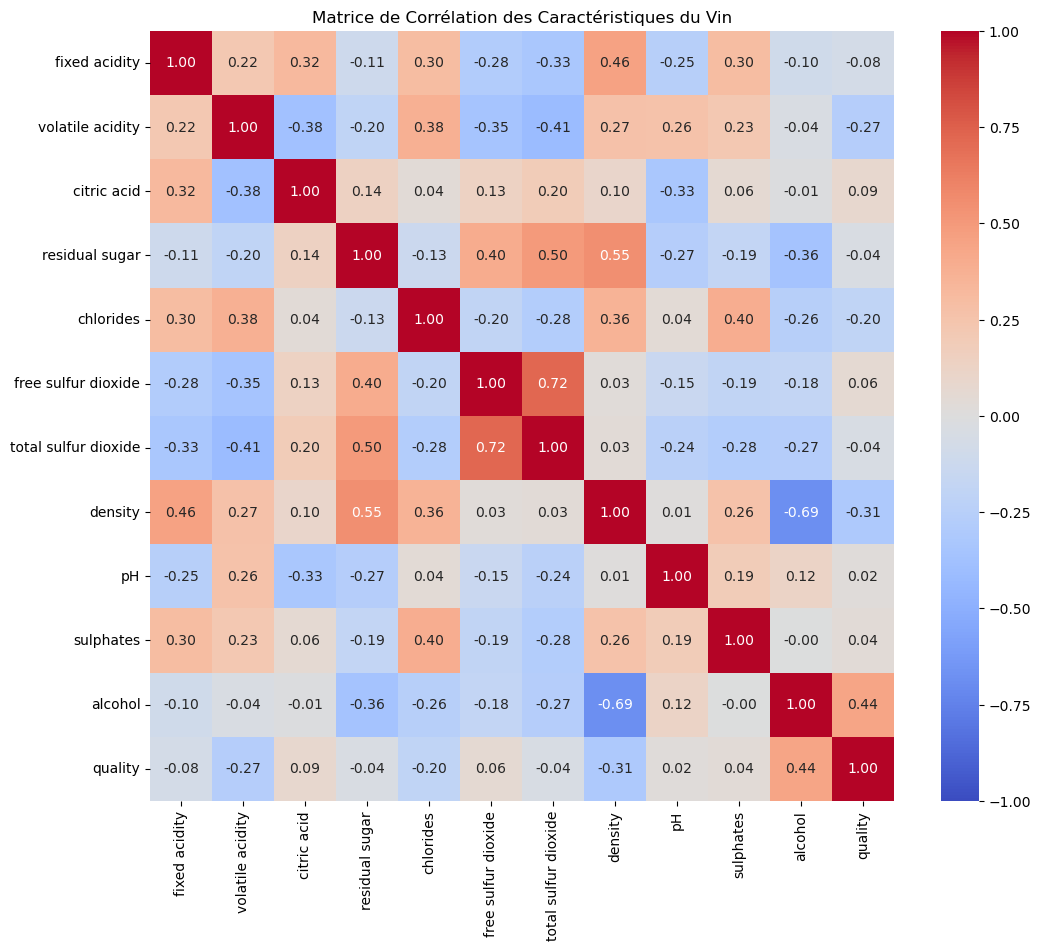

In [4]:
#  Matrice de Corrélation

numeric_df = df_wine.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Matrice de Corrélation des Caractéristiques du Vin')
plt.show()

En général, plus le taux d'alcool est élevé, plus la note de qualité a tendance à être élevée., plus la densité, l'acidité volatile ou le taux de chlorures sont élevés, plus la note de qualité a tendance à être basse.

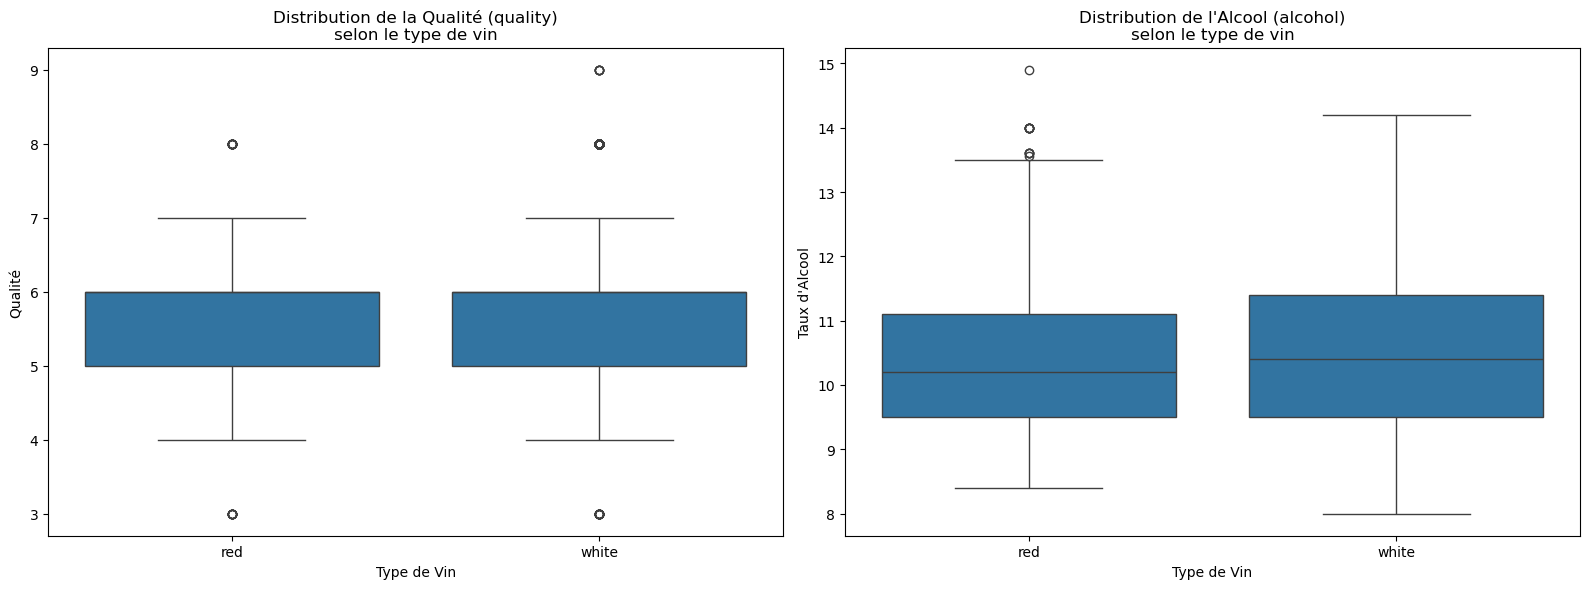

In [5]:
# Analyse de la variable 'type' (Rouge vs Blanc)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Graphique 1 : Qualité en fonction du type ---
sns.boxplot(x='type', y='quality', data=df_wine, ax=ax1)
ax1.set_title('Distribution de la Qualité (quality)\nselon le type de vin')
ax1.set_xlabel('Type de Vin')
ax1.set_ylabel('Qualité')

# --- Graphique 2 : Alcool en fonction du type ---
sns.boxplot(x='type', y='alcohol', data=df_wine, ax=ax2)
ax2.set_title('Distribution de l\'Alcool (alcohol)\nselon le type de vin')
ax2.set_xlabel('Type de Vin')
ax2.set_ylabel('Taux d\'Alcool')

plt.tight_layout()
plt.show()

In [6]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# On utilise .map() pour remplacer 'red' par 0 et 'white' par 1
df_wine['type'] = df_wine['type'].map({'red': 0, 'white': 1})
print("--- Colonne 'type' après encodage : ---")
print(df_wine['type'].value_counts()) # 1 = white (4898), 0 = red (1599)


y = df_wine['quality']

X = df_wine.drop('quality', axis=1) # axis=1 signifie "supprimer une colonne"

print("\n--- Forme de X (caractéristiques) : ---", X.shape)
print("--- Forme de y (cible) : ---", y.shape)


#  Division en ensembles d'entraînement et de test ---
# On utilise train_test_split de scikit-learn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # On garde 20% des données pour le test
    random_state=42,  
    stratify=y        
)

print(f"\n--- Taille du jeu d'entraînement : {X_train.shape[0]} échantillons ---")
print(f"--- Taille du jeu de test : {X_test.shape[0]} échantillons ---")


scaler = StandardScaler()

# On "apprend" la moyenne et l'écart-type UNIQUEMENT sur X_train
# et on transforme X_train
X_train_scaled = scaler.fit_transform(X_train)

# On applique la MÊME transformation (apprise sur X_train) à X_test
# On n'utilise PAS .fit() ici, seulement .transform() !
X_test_scaled = scaler.transform(X_test)

# Pour vérifier, affichons les 5 premières lignes de X_train_scaled
print("\n--- 5 premières lignes des données d'entraînement standardisées : ---")
print(X_train_scaled[:5])

--- Colonne 'type' après encodage : ---
type
1    4898
0    1599
Name: count, dtype: int64

--- Forme de X (caractéristiques) : --- (6497, 12)
--- Forme de y (cible) : --- (6497,)

--- Taille du jeu d'entraînement : 5197 échantillons ---
--- Taille du jeu de test : 1300 échantillons ---

--- 5 premières lignes des données d'entraînement standardisées : ---
[[-8.71596796e-01 -1.02564121e+00  6.95335502e-01  2.01128575e+00
  -6.65663202e-01 -1.44395740e-01  1.41645866e-01  6.97159356e-01
  -2.17021899e+00 -4.20609200e-01 -8.20575220e-01  5.75498715e-01]
 [-2.49531025e-01 -7.84307036e-01 -5.33707179e-01 -7.68194127e-01
  -1.01352450e+00 -7.67789711e-01 -6.33918074e-01 -1.60096268e+00
  -4.27778887e-01 -4.88748415e-01  1.53483054e+00  5.75498715e-01]
 [-6.38322132e-01 -4.82639321e-01  7.63615651e-01  1.48882713e+00
  -6.65663202e-01  1.89580271e+00  2.01004990e+00  8.83134549e-01
  -8.63388912e-01 -1.03386213e+00 -1.32530502e+00  5.75498715e-01]
 [ 3.72534746e-01 -1.08597475e+00  1.1732965

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

print("--- Entraînement du modèle RandomForestClassifier... ---")

# n_estimators=10000 : On demande 10 00  arbres dans notre forêt
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)


rf_model.fit(X_train_scaled, y_train)

print("--- Modèle entraîné ! ---")

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)

# Évaluation du modèle

# Calculer l'Accuracy globale
accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- Accuracy (Précision globale) du modèle : {accuracy * 100:.2f}% ---")

# Rapport de Classification détaillé
print("\n--- Rapport de Classification (classe par classe) : ---")

class_names = [f"Qualité {i}" for i in sorted(y.unique())]
print(classification_report(y_test, y_pred, target_names=class_names))

--- Entraînement du modèle RandomForestClassifier... ---
--- Modèle entraîné ! ---

--- Accuracy (Précision globale) du modèle : 69.54% ---

--- Rapport de Classification (classe par classe) : ---
              precision    recall  f1-score   support

   Qualité 3       0.00      0.00      0.00         6
   Qualité 4       0.67      0.09      0.16        43
   Qualité 5       0.75      0.72      0.73       428
   Qualité 6       0.67      0.80      0.73       567
   Qualité 7       0.67      0.57      0.62       216
   Qualité 8       1.00      0.36      0.53        39
   Qualité 9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.54      0.36      0.40      1300
weighted avg       0.70      0.70      0.68      1300



Comme les classes 5 et 6 représentent à elles seules la grande majorité des données, le modèle a appris que "dans le doute, prédire 5 est une bonne stratégie".

Il n'a pas vu assez d'exemples de vins "Qualité 9" (il n'y en avait que 2 dans le set de test ) pour apprendre à les reconnaître. Il préfère ne jamais en prédire.

Donc vu qu'on est pas assez precis on va plutot esssayer de répondre  à "Est-ce que ce vin est Mauvais, Moyen, ou Bon ?"

In [ ]:
# -Transformation de la Cible

bins = [0, 5, 6, 9]
labels = [0, 1, 2] # 0 = Mauvais (<=5), 1 = Moyen (6), 2 = Bon (>=7)


df_wine['categorie'] = pd.cut(df_wine['quality'], bins=bins, labels=labels, right=True)

print("--- Répartition de la nouvelle cible 'categorie' : ---")
print(df_wine['categorie'].value_counts().sort_index())
# 0 = Mauvais (2384 échantillons)
# 1 = Moyen (2836 échantillons)
# 2 = Bon (1277 échantillons)

y_categorie = df_wine['categorie']

# X reste le même (on enlève 'quality' ET notre nouvelle 'categorie')
X = df_wine.drop(['quality', 'categorie'], axis=1)

# On divise à nouveau en train/test, mais en stratifiant sur 'y_categorie'
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorie,
    test_size=0.2,
    random_state=42,
    stratify=y_categorie
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("\n--- Entraînement du NOUVEAU modèle (3 classes)... ---")

rf_model_3_classes = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_3_classes.fit(X_train_scaled, y_train)

print("--- Modèle entraîné ! ---")

y_pred_3_classes = rf_model_3_classes.predict(X_test_scaled)

new_accuracy = accuracy_score(y_test, y_pred_3_classes)
print(f"\n--- Accuracy (Précision globale) du NOUVEAU modèle : {new_accuracy * 100:.2f}% ---")

print("\n--- NOUVEAU Rapport de Classification (3 classes) : ---")
class_names = ["Mauvais (0)", "Moyen (1)", "Bon (2)"]
print(classification_report(y_test, y_pred_3_classes, target_names=class_names))

--- Répartition de la nouvelle cible 'categorie' : ---
categorie
0    2384
1    2836
2    1277
Name: count, dtype: int64

--- Entraînement du NOUVEAU modèle (3 classes)... ---
--- Modèle entraîné ! ---

--- Accuracy (Précision globale) du NOUVEAU modèle : 73.54% ---

--- NOUVEAU Rapport de Classification (3 classes) : ---
              precision    recall  f1-score   support

 Mauvais (0)       0.80      0.78      0.79       477
   Moyen (1)       0.69      0.74      0.72       567
     Bon (2)       0.73      0.64      0.68       256

    accuracy                           0.74      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.74      0.74      0.74      1300



Interprétation du Modèle (Feature Importance)

--- Importance des Caractéristiques (Classées) : ---
                 Feature  Importance
10               alcohol    0.133005
7                density    0.104615
1       volatile acidity    0.102742
6   total sulfur dioxide    0.087453
4              chlorides    0.086673
9              sulphates    0.084595
5    free sulfur dioxide    0.083459
3         residual sugar    0.082898
8                     pH    0.080659
2            citric acid    0.078352
0          fixed acidity    0.071883
11                  type    0.003665


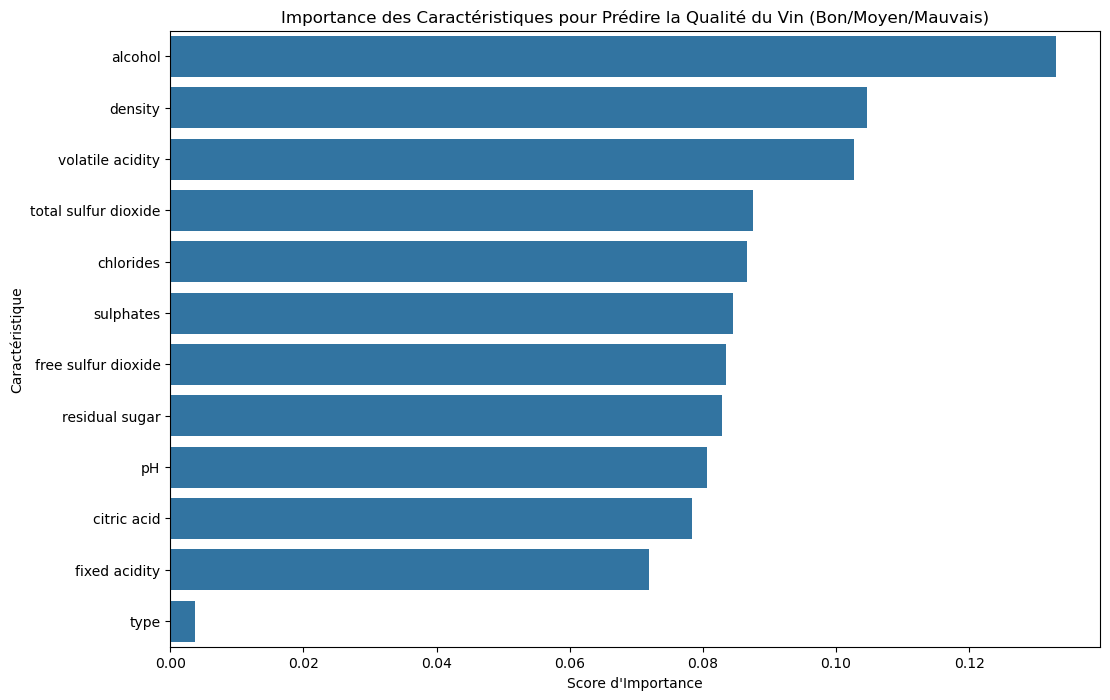

In [ ]:
importances = rf_model_3_classes.feature_importances_


feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- Importance des Caractéristiques (Classées) : ---")
print(importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des Caractéristiques pour Prédire la Qualité du Vin (Bon/Moyen/Mauvais)')
plt.xlabel('Score d\'Importance')
plt.ylabel('Caractéristique')
plt.show()


--- Analyse de la Variance Expliquée (ACP) ---
Nombre total de caractéristiques : 12
Nombre de composantes pour 90% de variance : 8
Variance totale expliquée par ces 8 composantes : 93.75%


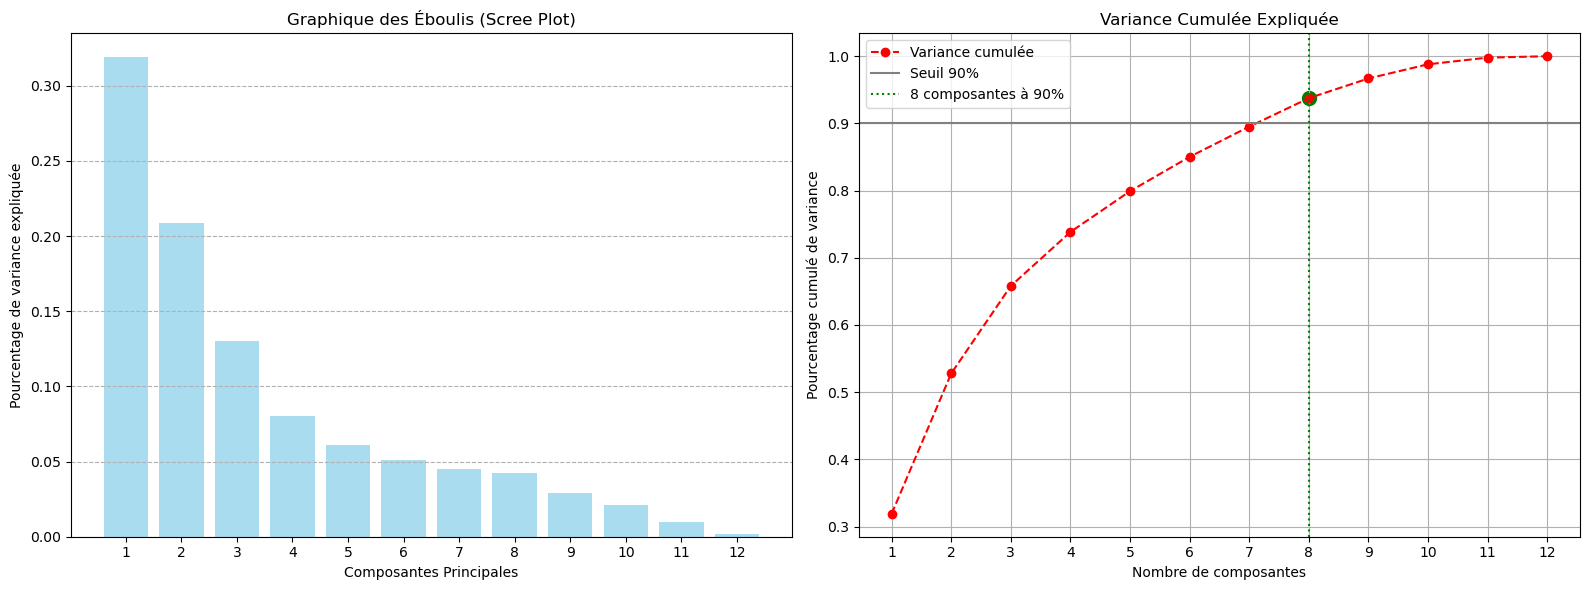

In [12]:
import numpy as np 
# n_components=None signifie "garder toutes les composantes"
# Il y en aura 12 (autant que nos caractéristiques originales)
pca_full = PCA(n_components=None)
pca_full.fit(X_train_scaled) # On l'entraîne sur nos données d'entraînement

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 3. Trouver le nombre de composantes pour 90% de variance
# np.where renvoie les indices où la condition est vraie
# On prend le premier [0][0] et on ajoute 1 car les indices commencent à 0
n_components_90 = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1

print("\n--- Analyse de la Variance Expliquée (ACP) ---")
print(f"Nombre total de caractéristiques : {X_train_scaled.shape[1]}")
print(f"Nombre de composantes pour 90% de variance : {n_components_90}")
print(f"Variance totale expliquée par ces {n_components_90} composantes : {cumulative_explained_variance[n_components_90 - 1] * 100:.2f}%")


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) # Premier sous-graphique
n_components = len(explained_variance_ratio)
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, color='skyblue', label='Variance individuelle')
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.title('Graphique des Éboulis (Scree Plot)')
plt.xticks(range(1, n_components + 1))
plt.grid(axis='y', linestyle='--')

plt.subplot(1, 2, 2) # Second sous-graphique
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red', label='Variance cumulée')

# Ligne pour le seuil de 90%
plt.axhline(y=0.90, color='grey', linestyle='-', label='Seuil 90%')
plt.axvline(x=n_components_90, color='green', linestyle=':', label=f'{n_components_90} composantes à 90%')
plt.scatter(n_components_90, cumulative_explained_variance[n_components_90 - 1], color='green', s=100)

plt.xlabel('Nombre de composantes')
plt.ylabel('Pourcentage cumulé de variance')
plt.title('Variance Cumulée Expliquée')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Comparaison avec le PLS-DA

In [13]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import classification_report, accuracy_score

# Pour le nombre de composantes
# On réutilise le nombre trouvé  (graphique de variance cumulée)

n_components_pls = n_components_90
print(f"--- Utilisation de {n_components_pls} composantes pour le PLS-DA (basé sur l'ACP à 90%) ---")

pls_model = PLSRegression(n_components=n_components_pls)
pls_model.fit(X_train_scaled, y_train)

y_pred_pls_raw = pls_model.predict(X_test_scaled)


y_pred_pls = np.round(y_pred_pls_raw)

# sécurité : "Clipper" les prédictions entre 0 et 2
# (Au cas où le modèle prédit -0.5 ou 2.8)
y_pred_pls = np.clip(y_pred_pls, 0, 2)

# Convertir en entiers pour le rapport
y_pred_pls = y_pred_pls.astype(int).flatten() 


pls_accuracy = accuracy_score(y_test, y_pred_pls)
print(f"\n--- Accuracy (Précision globale) du modèle PLS-DA : {pls_accuracy * 100:.2f}% ---")

print("\n--- Rapport de Classification (PLS-DA) : ---")
class_names = ["Mauvais (0)", "Moyen (1)", "Bon (2)"]
print(classification_report(y_test, y_pred_pls, target_names=class_names))

print("\n--- RAPPEL : Rapport de Classification (Random Forest) : ---")
# On ré-imprime l'ancien rapport pour comparer facilement
y_pred_rf = rf_model_3_classes.predict(X_test_scaled) # On refait la prédiction RF
print(classification_report(y_test, y_pred_rf, target_names=class_names))

--- Utilisation de 8 composantes pour le PLS-DA (basé sur l'ACP à 90%) ---

--- Accuracy (Précision globale) du modèle PLS-DA : 55.85% ---

--- Rapport de Classification (PLS-DA) : ---
              precision    recall  f1-score   support

 Mauvais (0)       0.70      0.45      0.55       477
   Moyen (1)       0.50      0.82      0.62       567
     Bon (2)       0.72      0.19      0.30       256

    accuracy                           0.56      1300
   macro avg       0.64      0.48      0.49      1300
weighted avg       0.62      0.56      0.53      1300


--- RAPPEL : Rapport de Classification (Random Forest) : ---
              precision    recall  f1-score   support

 Mauvais (0)       0.80      0.78      0.79       477
   Moyen (1)       0.69      0.74      0.72       567
     Bon (2)       0.73      0.64      0.68       256

    accuracy                           0.74      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.74      0.74      0.74   